In [1]:
import numpy as np
import pandas as pd

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel("default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9933,65d6ec37-53ff,410000,1,1,2,31,-1,-1,-1,0,...,4120,0,3086,0,4120,0,0,3086,4320,1
27356,68a89630-da51,340000,1,1,2,31,0,0,0,0,...,336498,321941,315006,14000,13000,13000,12000,12000,12000,0
3225,e3ba8a78-908d,20000,2,3,1,44,0,0,2,0,...,18780,0,0,3000,0,1000,1000,0,0,0
3449,61252a08-0837,210000,1,2,1,42,1,-2,-2,-2,...,321,1435,8480,0,326,326,1440,8521,9592,0
27889,69b8499a-f636,170000,2,1,2,26,Not available,-1,-1,-1,...,3732,4239,3910,3732,3732,3732,4239,3910,4146,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [7]:
import missingno as msno

<Axes: >

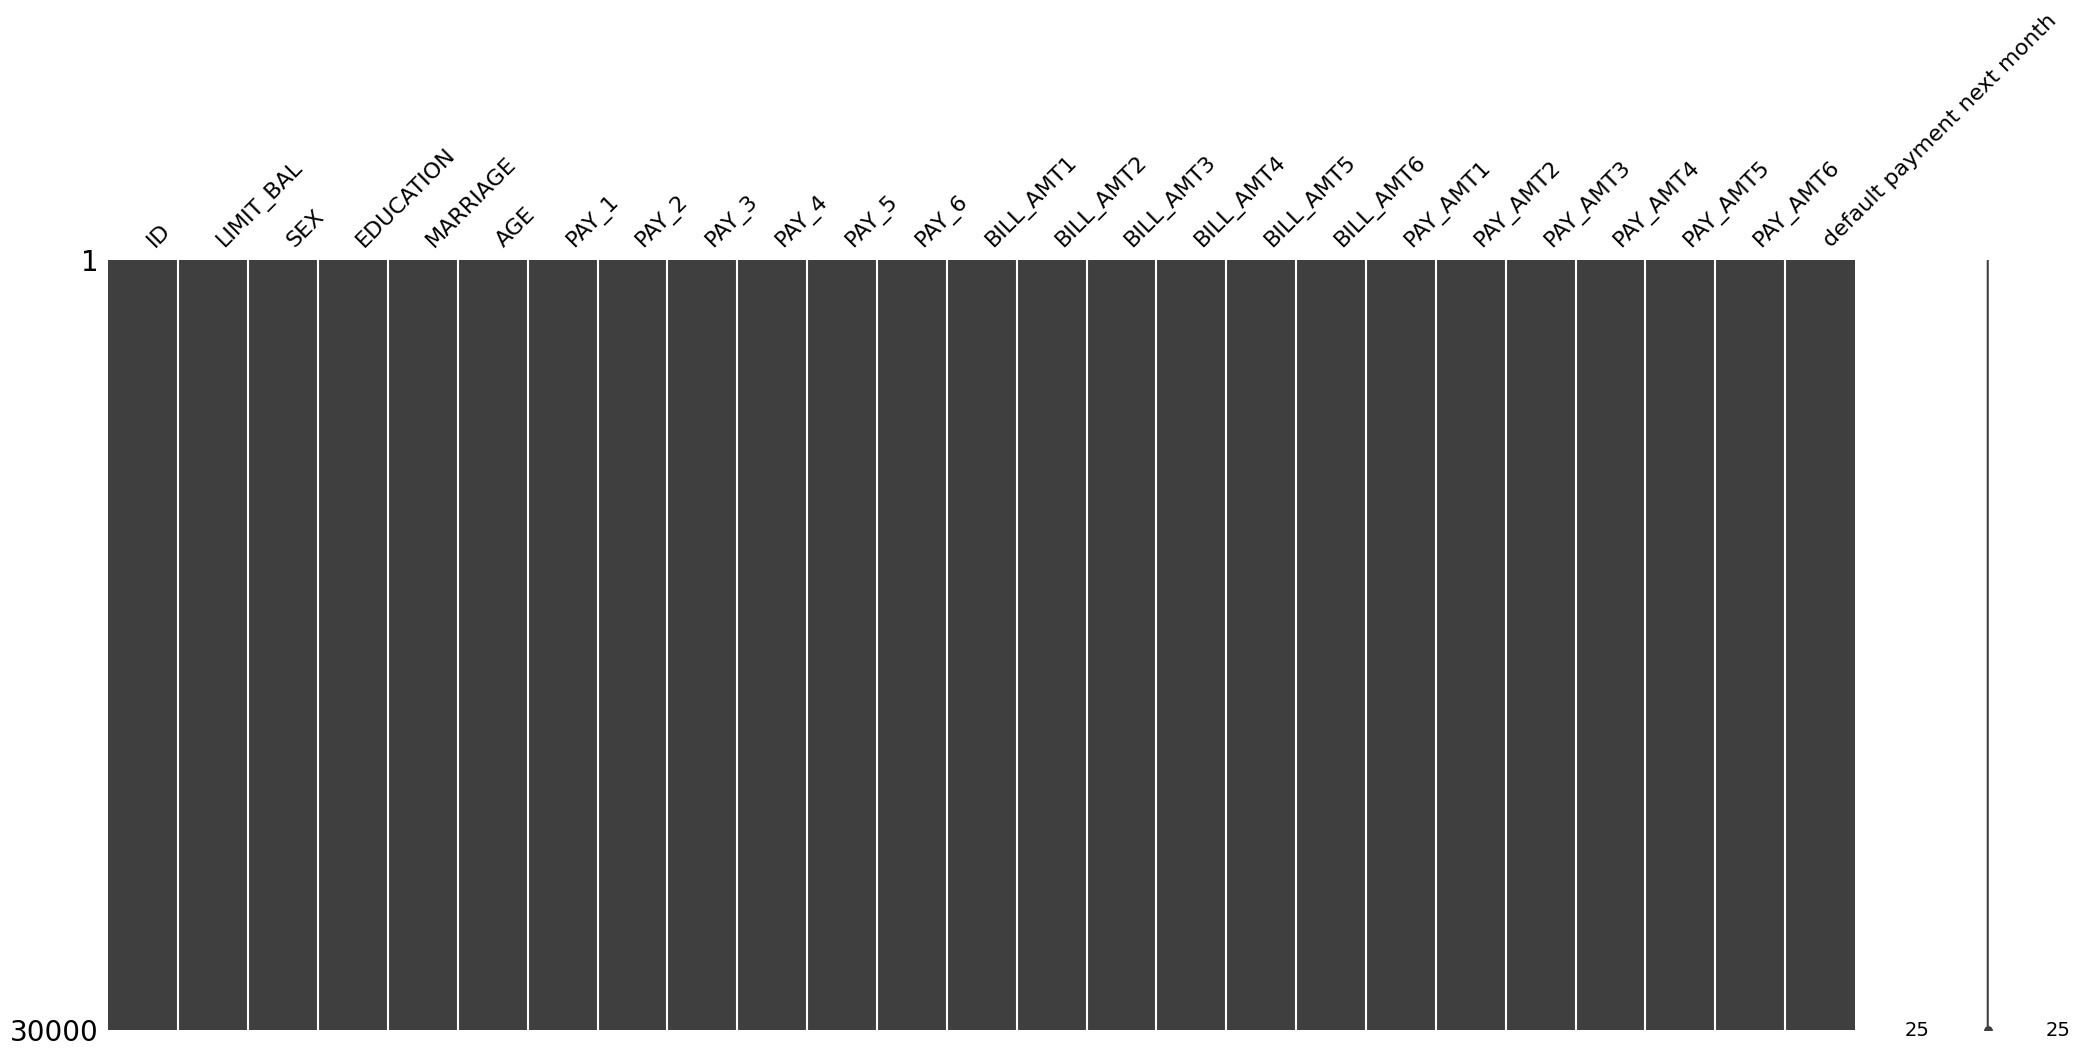

In [8]:
msno.matrix(df)

In [9]:
## count unique values of the ID column
df["ID"].nunique()

29687

In [10]:
id_counts = df["ID"].value_counts()

In [11]:
id_counts

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [12]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [13]:
## drop duplicates of the ID column
df = df.drop_duplicates("ID")

In [14]:
df["ID"].nunique()

29687

In [16]:
df["ID"].value_counts().value_counts()

count
1    29687
Name: count, dtype: int64

In [17]:
id_counts

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [28]:
## show rows where ID is duplicated
df.loc[df["ID"].isin(id_counts.index[id_counts.gt(1)])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29875,97d1d2eb-c72f,280000,1,1,1,31,0,0,0,0,...,149816,128721,130406,8900,8100,7200,5000,5000,4700,0


In [31]:
## show rows where all columns except the ID column has value 0
df.loc[(df.iloc[:,1:] == 0).all(axis=1)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,f12b9d9e-ada0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29590,e7cd8c1a-88e9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
## delete rows where all columns except the ID column has value 0
df = df.loc[~(df.iloc[:,1:] == 0).all(axis=1)]

In [34]:
df.shape

(29685, 25)

In [35]:
df["ID"].nunique()

29685

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [39]:
df['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [40]:
## remove rows where PAY_1 has value "Not available"
df = df.loc[df["PAY_1"] != "Not available"]

In [41]:
df.shape

(26664, 25)

In [42]:
## convert the datatype of PAY_1 to int
df["PAY_1"] = df["PAY_1"].astype("int64")

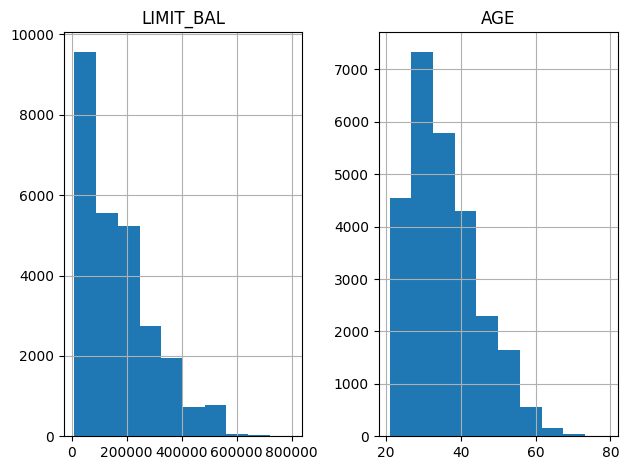

In [46]:
## histogram of Limit_Bal and Age
df[["LIMIT_BAL", "AGE"]].hist()
plt.tight_layout()
plt.show()

In [47]:
## describe the LIMIT_BAL and Age column
df[["LIMIT_BAL", "AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


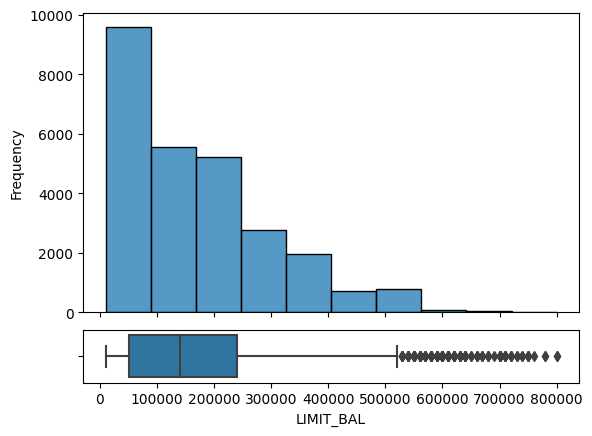

In [50]:
# Create a combined plot
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

# Histogram
sns.histplot(data=df, x="LIMIT_BAL", ax=ax_hist, kde=False, bins=10)
ax_hist.set_ylabel("Frequency")

# Horizontal boxplot
sns.boxplot(x=df["LIMIT_BAL"], ax=ax_box, orient="h")
ax_box.set_xlabel("LIMIT_BAL")

# Remove x-axis label for the histogram
ax_hist.set_xlabel("")

# Set the spacing between the histogram and boxplot
plt.subplots_adjust(hspace=0.1)

plt.show()

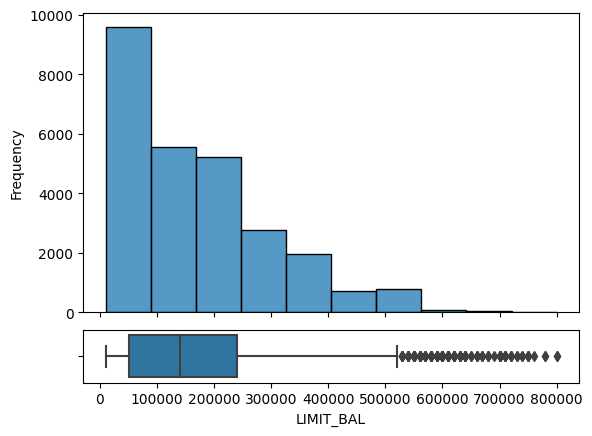

In [51]:
# Create a combined plot
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

# Histogram
sns.histplot(data=df, x="LIMIT_BAL", ax=ax_hist, kde=False, bins=10)
ax_hist.set_ylabel("Frequency")

# Horizontal boxplot
sns.boxplot(x=df["LIMIT_BAL"], ax=ax_box, orient="h")
ax_box.set_xlabel("LIMIT_BAL")

# Remove x-axis label for the histogram
ax_hist.set_xlabel("")

# Set the spacing between the histogram and boxplot
plt.subplots_adjust(hspace=0.1)

plt.show()

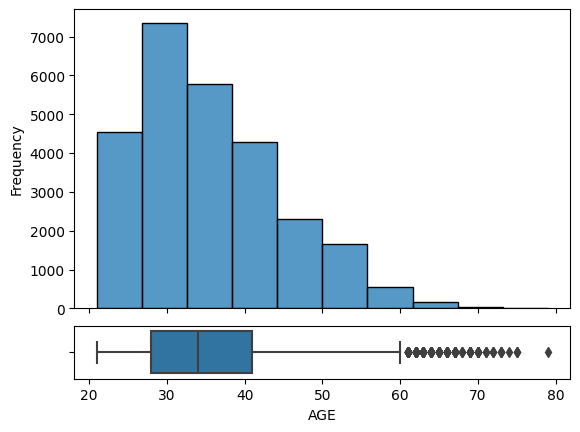

In [52]:
# Create a combined plot
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

# Histogram
sns.histplot(data=df, x="AGE", ax=ax_hist, kde=False, bins=10)
ax_hist.set_ylabel("Frequency")

# Horizontal boxplot
sns.boxplot(x=df["AGE"], ax=ax_box, orient="h")
ax_box.set_xlabel("AGE")

# Remove x-axis label for the histogram
ax_hist.set_xlabel("")

# Set the spacing between the histogram and boxplot
plt.subplots_adjust(hspace=0.1)

plt.show()

In [53]:
df["EDUCATION"].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [54]:
## replace 0, 5, 6 with 4
df["EDUCATION"] = df["EDUCATION"].replace([0, 5, 6], 4)

In [55]:
df["EDUCATION"].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [56]:
df["MARRIAGE"].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [57]:
## replace 0 with 3
df["MARRIAGE"] = df["MARRIAGE"].replace(0, 3)

In [58]:
df["MARRIAGE"].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [59]:
df.groupby("EDUCATION")["LIMIT_BAL"].mean()

EDUCATION
1    213725.031874
2    147275.646171
3    127013.168950
4    180521.739130
Name: LIMIT_BAL, dtype: float64

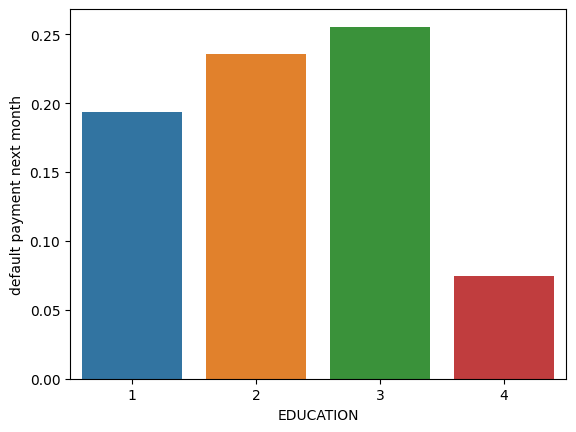

In [65]:
## bar plot of mean of default payment next month by education
sns.barplot(x="EDUCATION", y="default payment next month", data=df, estimator=np.mean, 
            errorbar=None)
plt.show()

<Axes: xlabel='EDUCATION', ylabel='default payment next month'>

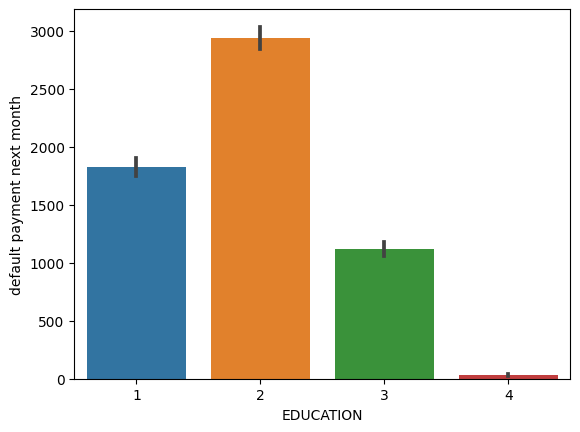

In [62]:
## bar plot of sum of default payment next month by education
sns.barplot(x="EDUCATION", y="default payment next month", data=df, estimator=sum)

In [66]:
cat_mapping = {1: "graduate school",\
               2: "university",\
               3: "high school",\
               4: "others"}

In [67]:
## create a conditional column named education_cat based on the mapping
df["EDUCATION_CAT"] = df["EDUCATION"].map(cat_mapping)

In [73]:
df["EDUCATION"].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [74]:
df["EDUCATION_CAT"].value_counts()

EDUCATION_CAT
university         12458
graduate school     9412
high school         4380
others               414
Name: count, dtype: int64